# import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

seed = 42
rng = RandomState(seed)

df = pd.read_csv('Model.csv')

X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12529, 59) (12529,)


In [2]:
import re

# train-test split

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10023, 59) (10023,)
Test set:  (2506, 59) (2506,)


In [4]:
len(df.columns)

61

# changing features names from <, [] to _ because XGBoost cannot handle those feature names with <,[] etc

In [5]:
df.columns

Index(['Unnamed: 0', 'destination_Home', 'destination_No Urgent Place',
       'destination_Work', 'passanger_Alone', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Rainy',
       'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'occupation_Architecture & Engineering',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Computer & Mathematical',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       

In [6]:
n=[]
for i in X_train.columns:
    name=str(re.sub(r"[ <,&)(_-]","",i).strip(" ").lower())
    n.append(name)

In [7]:
n

['destinationhome',
 'destinationnourgentplace',
 'destinationwork',
 'passangeralone',
 'passangerfriends',
 'passangerkids',
 'passangerpartner',
 'weatherrainy',
 'weathersnowy',
 'weathersunny',
 'couponbar',
 'couponcarryouttakeaway',
 'couponcoffeehouse',
 'couponrestaurant2050',
 'couponrestaurant20',
 'maritalstatusdivorced',
 'maritalstatusmarriedpartner',
 'maritalstatussingle',
 'maritalstatusunmarriedpartner',
 'maritalstatuswidowed',
 'occupationarchitectureengineering',
 'occupationartsdesignentertainmentsportsmedia',
 'occupationbuildinggroundscleaningmaintenance',
 'occupationbusinessfinancial',
 'occupationcommunitysocialservices',
 'occupationcomputermathematical',
 'occupationconstructionextraction',
 'occupationeducationtraininglibrary',
 'occupationfarmingfishingforestry',
 'occupationfoodpreparationservingrelated',
 'occupationhealthcarepractitionerstechnical',
 'occupationhealthcaresupport',
 'occupationinstallationmaintenancerepair',
 'occupationlegal',
 'occupa

In [8]:
n1=[]
for i in X_test.columns:
    name=str(re.sub(r"[ <,&)(_-]","",i).strip(" ").lower())
    n1.append(name)

In [9]:
n1

['destinationhome',
 'destinationnourgentplace',
 'destinationwork',
 'passangeralone',
 'passangerfriends',
 'passangerkids',
 'passangerpartner',
 'weatherrainy',
 'weathersnowy',
 'weathersunny',
 'couponbar',
 'couponcarryouttakeaway',
 'couponcoffeehouse',
 'couponrestaurant2050',
 'couponrestaurant20',
 'maritalstatusdivorced',
 'maritalstatusmarriedpartner',
 'maritalstatussingle',
 'maritalstatusunmarriedpartner',
 'maritalstatuswidowed',
 'occupationarchitectureengineering',
 'occupationartsdesignentertainmentsportsmedia',
 'occupationbuildinggroundscleaningmaintenance',
 'occupationbusinessfinancial',
 'occupationcommunitysocialservices',
 'occupationcomputermathematical',
 'occupationconstructionextraction',
 'occupationeducationtraininglibrary',
 'occupationfarmingfishingforestry',
 'occupationfoodpreparationservingrelated',
 'occupationhealthcarepractitionerstechnical',
 'occupationhealthcaresupport',
 'occupationinstallationmaintenancerepair',
 'occupationlegal',
 'occupa

In [10]:
for i in n:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [11]:
X_train.columns

Index(['destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'occupation_Architecture & Engineering',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Computer & Mathematical',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       'occupation_Food Prep

In [12]:
for c in X_test.columns:
    if re.findall(",",c):
        print(c)

In [13]:
X_test.columns = n1

In [14]:
X_train.columns

Index(['destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'occupation_Architecture & Engineering',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Computer & Mathematical',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       'occupation_Food Prep

In [15]:
X_train.columns=n

In [16]:
X_test.columns

Index(['destinationhome', 'destinationnourgentplace', 'destinationwork',
       'passangeralone', 'passangerfriends', 'passangerkids',
       'passangerpartner', 'weatherrainy', 'weathersnowy', 'weathersunny',
       'couponbar', 'couponcarryouttakeaway', 'couponcoffeehouse',
       'couponrestaurant2050', 'couponrestaurant20', 'maritalstatusdivorced',
       'maritalstatusmarriedpartner', 'maritalstatussingle',
       'maritalstatusunmarriedpartner', 'maritalstatuswidowed',
       'occupationarchitectureengineering',
       'occupationartsdesignentertainmentsportsmedia',
       'occupationbuildinggroundscleaningmaintenance',
       'occupationbusinessfinancial', 'occupationcommunitysocialservices',
       'occupationcomputermathematical', 'occupationconstructionextraction',
       'occupationeducationtraininglibrary',
       'occupationfarmingfishingforestry',
       'occupationfoodpreparationservingrelated',
       'occupationhealthcarepractitionerstechnical',
       'occupationhealt

In [17]:
len(X_train.columns)

59

In [18]:
len(X_test.columns)

59

In [19]:
X_train

,destinationhome,destinationnourgentplace,destinationwork,passangeralone,passangerfriends,passangerkids,passangerpartner,weatherrainy,weathersnowy,weathersunny,...,restaurant20to50,income,education,age,time,expiration,drivingdistance,gender,haschildren,directionopp
2589,0,1,0,0,1,0,0,0,0,1,...,2,8,4,6,1,0,1,1,1,1
11869,0,1,0,0,1,0,0,0,0,1,...,1,7,4,1,0,0,0,1,0,1
7199,0,1,0,0,1,0,0,0,0,1,...,2,7,4,2,1,1,1,0,0,1
315,0,0,1,1,0,0,0,0,0,1,...,1,4,5,5,0,0,1,1,1,1
10739,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1,0,0,1,0,0,0,0,0,1,...,3,2,4,4,1,0,1,0,0,0
5191,0,0,1,1,0,0,0,0,0,1,...,1,5,5,7,0,1,2,1,1,1
5390,0,1,0,0,1,0,0,0,0,1,...,0,1,2,5,0,0,1,0,1,1
860,1,0,0,1,0,0,0,0,0,1,...,1,4,3,2,1,0,0,0,0,1


In [20]:
len(X_train.columns.values)

59

In [21]:
X_train.columns.nunique()

59

In [22]:
for i in X_train.columns:
    print(i)
    print(list(X_train.columns).count(i))

destinationhome
1
destinationnourgentplace
1
destinationwork
1
passangeralone
1
passangerfriends
1
passangerkids
1
passangerpartner
1
weatherrainy
1
weathersnowy
1
weathersunny
1
couponbar
1
couponcarryouttakeaway
1
couponcoffeehouse
1
couponrestaurant2050
1
couponrestaurant20
1
maritalstatusdivorced
1
maritalstatusmarriedpartner
1
maritalstatussingle
1
maritalstatusunmarriedpartner
1
maritalstatuswidowed
1
occupationarchitectureengineering
1
occupationartsdesignentertainmentsportsmedia
1
occupationbuildinggroundscleaningmaintenance
1
occupationbusinessfinancial
1
occupationcommunitysocialservices
1
occupationcomputermathematical
1
occupationconstructionextraction
1
occupationeducationtraininglibrary
1
occupationfarmingfishingforestry
1
occupationfoodpreparationservingrelated
1
occupationhealthcarepractitionerstechnical
1
occupationhealthcaresupport
1
occupationinstallationmaintenancerepair
1
occupationlegal
1
occupationlifephysicalsocialscience
1
occupationmanagement
1
occupationoffic

In [23]:
from xgboost import XGBClassifier

In [24]:
xgb= XGBClassifier(random_state=seed,n_jobs=-1)
eval_set = [(X_test,y_test)]
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_metric="logloss",eval_set=eval_set,verbose=True)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64021
[1]	validation_0-logloss:0.61551
[2]	validation_0-logloss:0.59678
[3]	validation_0-logloss:0.58085
[4]	validation_0-logloss:0.57374
[5]	validation_0-logloss:0.56539
[6]	validation_0-logloss:0.55495
[7]	validation_0-logloss:0.55053
[8]	validation_0-logloss:0.54688
[9]	validation_0-logloss:0.54540
[10]	validation_0-logloss:0.54353
[11]	validation_0-logloss:0.53938
[12]	validation_0-logloss:0.53841
[13]	validation_0-logloss:0.53541
[14]	validation_0-logloss:0.53552
[15]	validation_0-logloss:0.53444
[16]	validation_0-logloss:0.53188
[17]	validation_0-logloss:0.53092
[18]	validation_0-logloss:0.52767
[19]	validation_0-logloss:0.52774
[20]	validation_0-logloss:0.52653
[21]	validation_0-logloss:0.52521
[22]	validation_0-logloss:0.52403
[23]	validation_0-logloss:0.52417
[24]	validation_0-logloss:0.52320
[25]	validation_0-logloss:0.51968
[26]	validation_0-logloss:0.51852
[27]	validation_0-logloss:0.51485
[28]	validation_0-logloss:0.51600
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [1,2,3,4,5,6],
    'learning_rate':[0.001,0.01,0.1,1,10],
    'subsample':[0.3,0.5,0.7],
    'colsample_bytree':[0.3,0.5,0.7],
    'reg_alpha ':[0.05,0.1,0.3,1,5],
    'gamma':[0,1,5]
}

# accuracy score

In [26]:
from sklearn.metrics import accuracy_score
pred = xgb.predict(X_test)
accuracy_score(y_test, pred)

0.7645650438946529

#### To increase accuracy of XGBoost,its hyperparametres can be tuned further 

# comparisons of all the models 

In [29]:
table=pd.DataFrame({
        "Model":['Decision Tree','Random Forest','Logistic Regression','GradientBoost','XgBoost'],
        "Accuracy":[0.6983,0.7545,0.673,0.7474,0.7645]
})
table

,Model,Accuracy
0,Decision Tree,0.6983
1,Random Forest,0.7545
2,Logistic Regression,0.6730
3,GradientBoost,0.7474
4,XgBoost,0.7645


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

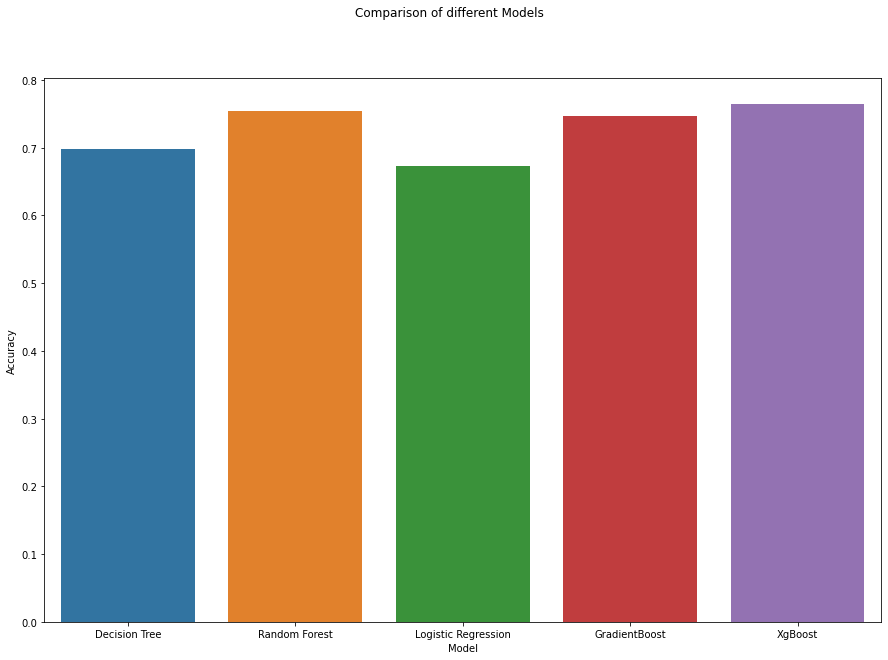

In [30]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

fig.suptitle('Comparison of different Models')

sns.barplot(data=table, x='Model', y='Accuracy')

# Conclusion and Scope of Further Improvements 

#### 1. hyparameters of  XGBoost can be tuned further..

#### 2. I havenot used Adaboost and CATBoost here, which can be used further to evaluate accuracy on that.


#### 3. After getting a good accuracy on test dataset as well as training dataset, and consulting with clients the model can finally be deployed. 